In [1]:
import copy
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn import datasets, preprocessing
import pandas as pd
from pymanopt.solvers import TrustRegions
from manopt_dr.core import gen_ldr
from manopt_dr.predefined_func_generator import *

In [2]:
# Generate data

"""
Number of Instances:  1484 for the Yeast dataset.
Class Distribution. The class is the localization site. Please see Nakai &
		       Kanehisa referenced above for more details.
  CYT (cytosolic or cytoskeletal)                    463
  NUC (nuclear)                                      429
  MIT (mitochondrial)                                244
  ME3 (membrane protein, no N-terminal signal)       163
  ME2 (membrane protein, uncleaved signal)            51
  ME1 (membrane protein, cleaved signal)              44
  EXC (extracellular)                                 37
  VAC (vacuolar)                                      30
  POX (peroxisomal)                                   20
  ERL (endoplasmic reticulum lumen)                    5
"""

X = pd.read_csv("yeast.data", header = None,usecols=[ 1,2,3,4,5,6,7,8],delim_whitespace=True)
y = pd.read_csv("yeast.data", header = None,usecols=[ 9],delim_whitespace=True)


n_samples, n_features = X.shape
X = X.values.tolist()
y = y.values.tolist()
mapped = []
for j in y:
    mapped.append(' '.join(map(str, j)) )
y = mapped
d = dict([(b,a) for a,b in enumerate(sorted(set(y)))])
y = [d[i] for i in y]
n_components = 2
X = preprocessing.scale(X)


In [3]:
"""
# ccPCA
X_tg = X[y == 2, :]
X_bg = X[y != 2, :]
CCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)
ccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)
Z = ccpca.transform(X)
cost = ccpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'
)
plt.show()
"""

"\n# ccPCA\nX_tg = X[y == 2, :]\nX_bg = X[y != 2, :]\nCCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)\nccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)\nZ = ccpca.transform(X)\ncost = ccpca.get_final_cost()\ncontrastiveness = 1 / cost\n\n# Plot\nplt.figure(figsize=(6, 6))\nplt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)\nplt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)\nplt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)\nplt.legend(loc='best', shadow=False, scatterpoints=1)\nplt.title(\n    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'\n)\nplt.show()\n"

[[-0.07758852 -0.14911398]
 [-1.04476437 -0.57342266]
 [ 0.280528    0.01493491]
 ...
 [-0.05829734 -0.13640849]
 [ 0.97643501  0.3496412 ]
 [ 0.93038141  0.30633681]]


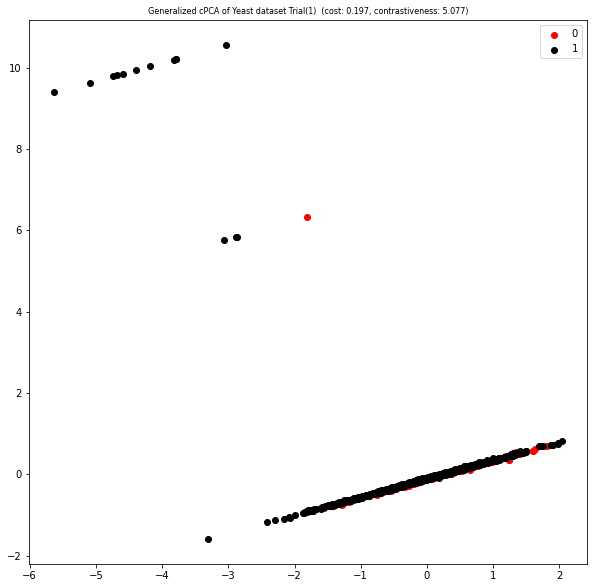

In [4]:
# generalized cPCA
# Classification is mapped as 
"""
    { 'CYT':0, 'ERL':1, 'EXC':2, 'ME1':3, 'ME2':4, 'ME3:5', 'MIT':6, 'NUC':7, 'POX':8, 'VAC':9}
"""
GCPCA = gen_ldr(gen_cost_gcpca, gen_default_proj)

# Trial 1: 
"""
    Group 1: [0,1,2,3,4] Group 2: [5,6,7,8,9]    
"""

g1 = [0,1,2,3,4]
g2 = [5,6,7,8,9]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(1)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()


[[ 0.00975013 -0.18360872]
 [-0.55845342 -1.09121809]
 [ 0.20837014  0.1451656 ]
 ...
 [ 0.05679893 -0.09859211]
 [ 0.58559595  0.79727001]
 [ 0.58126143  0.75132435]]


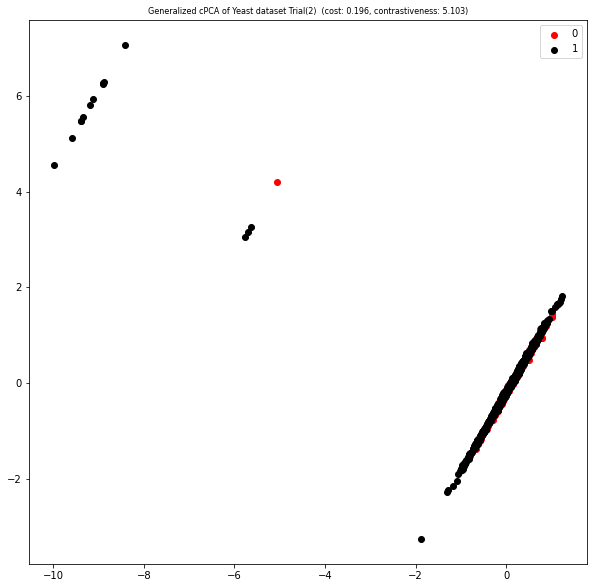

In [5]:
# Trial 2: 
"""
    Group 1: [0,2,3,4] Group 2: [1,5,6,7,8,9]    
"""
g1 = [0,2,3,4]
g2 = [1,5,6,7,8,9]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
print(Z)
plt.figure(figsize=(10, 10))

"""
for i in range(len(Z)):
    if y[i] in g1:
        plt.plot(Z[i][0], Z[i][1],  'ro')
    else:
        plt.plot(Z[i][0], Z[i][1],  'ko')

#plt.scatter(Z[tg][0], Z[tg][1], c='r', label = 0)
#plt.scatter(Z[bg][0], Z[bg][1], c='b', label = 1)

#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(2)' ,
    fontsize=8)
plt.show()
"""

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(2)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()



[[ 0.30552058 -0.07139764]
 [ 1.12460474 -0.61735396]
 [-0.01753152  0.13496665]
 ...
 [ 0.0046099   0.11478802]
 [-0.68918792  0.54722432]
 [-0.61240536  0.52250476]]


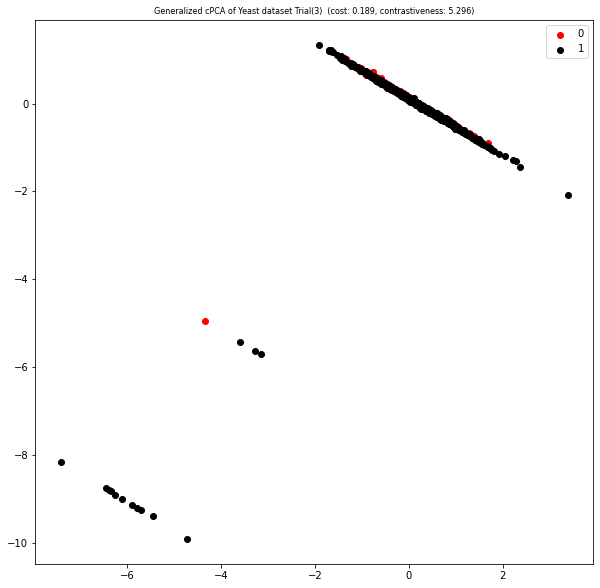

In [6]:
# Trial 3: 
"""
    Group 1: [0,3,4] Group 2: [1,2,5,6,7,8,9]    
"""
g1 = [0,3,4]
g2 = [1,2,5,6,7,8,9]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(3)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()

[[ 0.05852015  0.39007701]
 [-0.04822691  0.14306845]
 [ 0.02658667  0.3103204 ]
 ...
 [-0.10797099 -0.01398464]
 [ 0.25917697  0.85771498]
 [-0.04340646  0.1416132 ]]


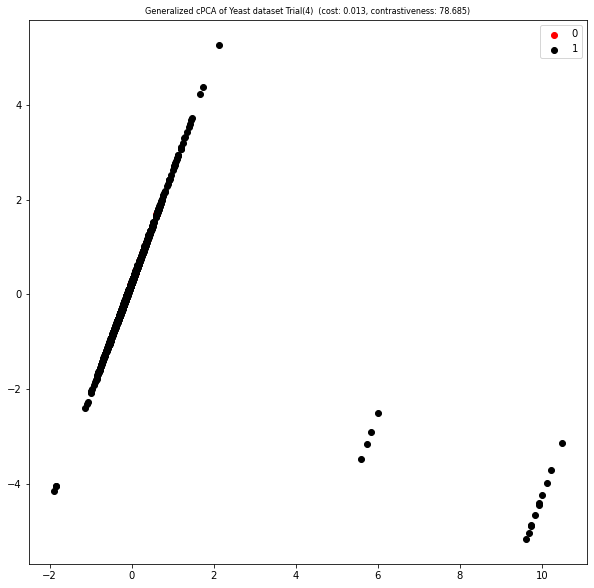

In [7]:
# Trial 4: 
"""
    Group 1: [3,4] Group 2: [0,1,2,5,6,7,8,9]    
"""
g1 = [3,4]
g2 = [0,1,2,5,6,7,8,9]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='black', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(4)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()

[[ 0.14459328  0.08229841]
 [ 0.94177853 -0.08508969]
 [-0.30930752  0.16248764]
 ...
 [ 0.36946184  0.03955462]
 [-1.2100244   0.30649573]
 [-1.03059318  0.2983864 ]]


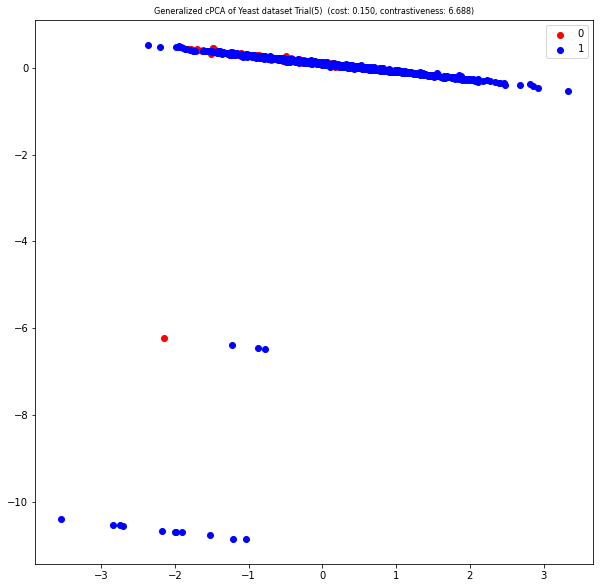

In [11]:
# Trial 5: 
"""
    Group 1: [0] Group 2: [1,2,3,4,5,6,7,8,9]    
"""
g1 = [0]
g2 = [1,2,3,4,5,6,7,8,9]

y_tg = copy.deepcopy(y)
y_tg = np.asarray(y_tg)

for i in g1:
    y_tg[y_tg == i] = -1

y_bg = copy.deepcopy(y)
y_bg = np.asarray(y_bg)

for i in g2:
    y_bg[y_bg == i] = -1

gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
Z = gcpca.transform(X)
cost = gcpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
print(Z)
plt.figure(figsize=(10, 10))

tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

#for i in range(len(Z)):
#    if y[i] in g1:
#        plt.plot(Z[i][0], Z[i][1],  'ro')
#    else:
#        plt.plot(Z[i][0], Z[i][1],  'ko')

plt.scatter(tg_x, tg_y, c='r', label = 0)
plt.scatter(bg_x, bg_y, c='b', label = 1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'Generalized cPCA of Yeast dataset Trial(5)  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
    fontsize=8)
plt.show()
